**Importation des librairies**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Chargement du dataset**

In [3]:
df = pd.read_csv("Mall_customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Pré-analyse des  données**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Selection des variables**

In [6]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Détermination du nombre optimal de clusters**

Text(0.5, 1.0, 'Méthode du coude')

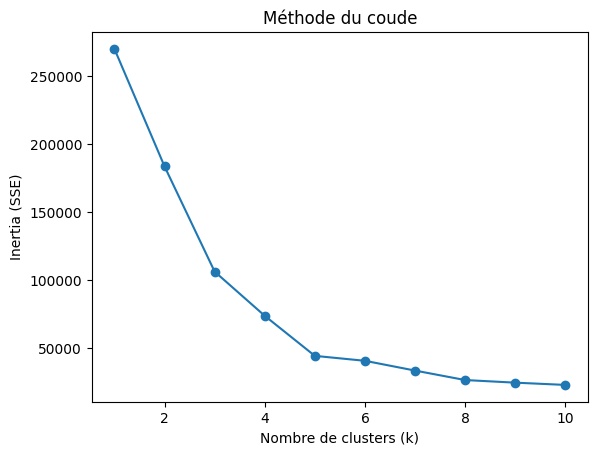

In [7]:
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Méthode du coude")

**Application du KMeans**

In [8]:
Kmeans = KMeans(n_clusters = 5, random_state = 42)
df["Cluster"] = Kmeans.fit_predict(X)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


**Visualisation des clusters**

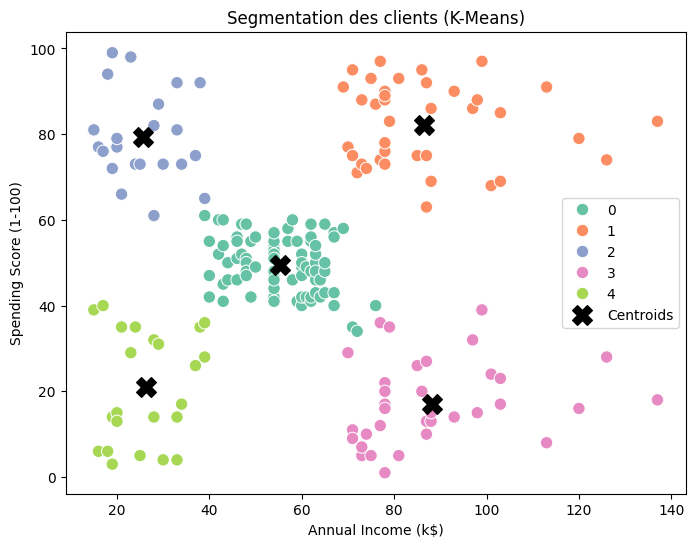

In [9]:
plt.figure(figsize = (8, 6))

sns.scatterplot(
    data=df, 
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    hue="Cluster", 
    palette="Set2", 
    s=80
)

# Ajouter les centres
centers = Kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='black', s=200, marker='X', label='Centroids'
)

plt.title("Segmentation des clients (K-Means)")
plt.legend()
plt.show()

**Analyse des clusters**

In [10]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [11]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].min()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,18,39,34
1,27,69,63
2,18,15,61
3,19,70,1
4,19,15,3


In [13]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].max()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,70,76,61
1,40,137,97
2,35,39,99
3,59,137,39
4,67,39,40
